In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [2]:
master = pd.read_csv('data/master_df.csv')
# master.drop(['Unnamed: 0','Unnamed: 0.1','SHOOTING'],axis=1,inplace=True)
# master = pd.get_dummies(master, columns=['DAY_OF_WEEK'])
master.neighborhood_avg = np.log(master.neighborhood_avg)
master.closest_property_value = np.log(master.closest_property_value)
master.head()

,Lat,Long,MONTH,HOUR,TAVG,PRCP,SNOW,closest_property_value,neighborhood_avg,lamp_min_dist,lamp_density,category,police_min_dist,hospital_min_dist,school_min_dist,school_density,DAY_OF_WEEK_Friday,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday
0,42.364331,-71.063193,9,4,70.0,0.0,0.0,2.823953,2.707245,0.000070,5151.0,violent,0.003822,0.001813,0.008471,2.0,0,0,0,1,0,0,0
1,42.314630,-71.092615,9,4,70.0,0.0,0.0,2.545883,2.567746,0.000083,2525.0,burglary,0.012987,0.003940,0.001727,8.0,0,0,0,1,0,0,0
2,42.279675,-71.083813,9,3,70.0,0.0,0.0,2.564721,2.567637,0.000078,1757.0,possession weapons,0.009369,0.008593,0.003386,5.0,0,0,0,1,0,0,0
3,42.379124,-71.028082,9,2,70.0,0.0,0.0,2.749753,2.752549,0.000109,5544.0,violent,0.013315,0.038462,0.002467,4.0,0,0,0,1,0,0,0
4,42.379124,-71.028082,9,2,70.0,0.0,0.0,2.547474,2.566139,0.000157,1382.0,violent,0.013315,0.038462,0.002467,4.0,0,0,0,1,0,0,0


In [3]:
X, y = master.drop(['category'], axis=1), master['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
def calc_meanstd(X_train, y_train, depths):

    # store output variables
    cvmeans      = []
    cvstds       = []
    train_scores = []
    
    # test different tree depths
    for depth in depths:
        
        print("Depth " + str(depth) + " ...")
        
        # create model
        rf = RandomForestClassifier(max_depth=depth)
        
        # use k=5 cross validation to evaluate performance
        cv_scores = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1)
        
        # store mean and std of cv scores
        cvmeans.append(np.mean(cv_scores))
        cvstds.append(np.std(cv_scores))
    
        # evaluate performance on training set
        rf.fit(X_train,y_train)
        y_pred_train = rf.predict(X_train)
        acc_score_train = accuracy_score(y_pred_train, y_train)
        train_scores.append(acc_score_train)
    
    # end of your code here
    return cvmeans, cvstds, train_scores

In [5]:
depths = list(range(1, 16))

cvmeans, cvstds, train_scores = calc_meanstd(X_train, y_train, depths)

Depth 1 ...
Depth 2 ...
Depth 3 ...
Depth 4 ...
Depth 5 ...
Depth 6 ...
Depth 7 ...
Depth 8 ...
Depth 9 ...
Depth 10 ...
Depth 11 ...
Depth 12 ...
Depth 13 ...
Depth 14 ...
Depth 15 ...


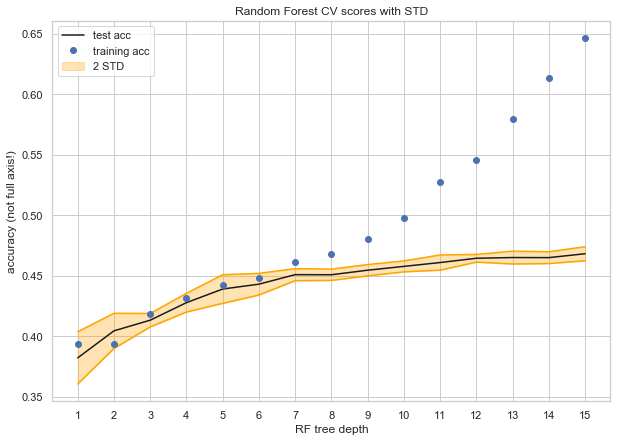

In [6]:
# initialize figure
fig = plt.figure(figsize=(10,7))

# get data for mean +/- 2std
stdabove = np.array(cvmeans) + 2*np.array(cvstds)
stdbelow = np.array(cvmeans) - 2*np.array(cvstds)

# plot cvmeans and cvstds
plt.plot(cvmeans,'k',label='test acc')
plt.plot(stdabove,'orange')
plt.plot(stdbelow,'orange')

# fill in between space
plt.fill_between(range(len(cvmeans)),stdbelow,stdabove,color='orange',alpha=.3,label='2 STD')

# plot training scores
plt.plot(train_scores,'o',label='training acc')

# plot formatting
plt.title('Random Forest CV scores with STD')
plt.xlabel('RF tree depth')
# plt.ylim(0.54,0.7) # can set the y-axis to focus on the cross-validation performance
plt.xticks(range(len(depths)),depths)
plt.ylabel('accuracy (not full axis!)')
plt.legend()
plt.show()

In [7]:
lr = LogisticRegressionCV(cv=5)

# evaluate performance on training set
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
acc_score_train = accuracy_score(y_pred_train, y_train)
acc_score_test = accuracy_score(y_pred_test, y_test)

In [8]:
print(acc_score_train)
print(acc_score_test)

0.3711329170383586
0.37718254912222277
